# [NTDS'18] milestone 2: network models
[ntds'18]: https://github.com/mdeff/ntds_2018

[Hermina Petric Maretic](https://people.epfl.ch/hermina.petricmaretic), [EPFL LTS4](https://lts4.epfl.ch)

## Students

* Team: `27`
* Students: `Abrate Marco Pietro, Bolón Brun Natalie, Kakavandy Shahow, Park Jangwon`
* Dataset: `Terrorist attacks and relations`

## Rules

* Milestones have to be completed by teams. No collaboration between teams is allowed.
* Textual answers shall be short. Typically one to two sentences.
* Code has to be clean.
* In the first part, you cannot import any other library than we imported. In the second part, you are allowed to import any library you want.
* When submitting, the notebook is executed and the results are stored. I.e., if you open the notebook again it should show numerical results and plots. We won't be able to execute your notebooks.
* The notebook is re-executed from a blank state before submission. That is to be sure it is reproducible. You can click "Kernel" then "Restart & Run All" in Jupyter.

## Objective

The purpose of this milestone is to explore various random network models, analyse their properties and compare them to your network. In the first part of the milestone you will implement two random graph models and try to fit them to your network. In this part you are not allowed to use any additional package. In the second part of the milestone you will choose a third random graph model that you think shares some properties with your network. You will be allowed to use additional packages to construct this network, but you must explain your network choice. Finally, make your code as clean as possible, and keep your textual answers short.

## Part 0

Import the adjacency matrix of your graph that you constructed in milestone 1, as well as the number of nodes and edges of your network.

In [1]:
import numpy as np

adjacency = np.load('adjacency.npy')
# deleting nodes without any connection
zero_index = np.where(np.sum(adjacency, axis=0) == 0)[0]
adjacency = np.delete(adjacency, zero_index, axis = 0)
adjacency = np.delete(adjacency, zero_index, axis = 1)

n_nodes =  np.count_nonzero(np.sum(adjacency, axis=0))
n_edges =  np.count_nonzero(adjacency) / 2

print('Number of nodes = {n:}'.format(n=n_nodes))
print('Number of edges = {e:}'.format(e=n_edges))

Number of nodes = 848
Number of edges = 8196.0


## Part 1

**For the computation of this part of the milestone you are only allowed to use the packages that have been imported in the cell below.**

In [2]:
%matplotlib inline

import random

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

### Question 1

Create a function that constructs an Erdős–Rényi graph.

In [3]:
def erdos_renyi(n, p, seed=None):
    """Create an instance from the Erdos-Renyi graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    p: float
        Edge probability. A number between 0 and 1.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    
    np.random.seed(seed)
    
    # Define adjacency of all zeros
    adjacency = np.zeros((n,n))
    
    for i in range(n):
        for j in range(n):
            if i >= j: continue
                
            # Select a random number between 0 and 1
            num_rand = np.random.uniform(0,1)
            # Construct link if less than p
            if num_rand < p:
                adjacency[i,j] = 1
                adjacency[j,i] = 1
    
    return adjacency

Text(0.5,1.05,'Erdos-Renyi (5, 0.6)')

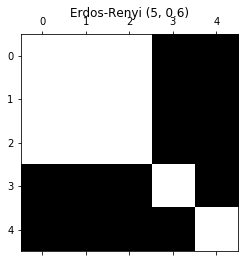

In [4]:
er = erdos_renyi(5, 0.6, 9765)
plt.spy(er)
plt.title('Erdos-Renyi (5, 0.6)')

Text(0.5,1.05,'Erdos-Renyi (10, 0.4)')

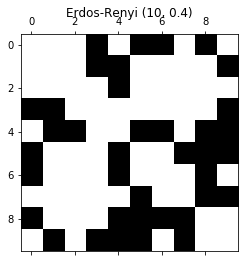

In [5]:
er = erdos_renyi(10, 0.4, 7648)
plt.spy(er)
plt.title('Erdos-Renyi (10, 0.4)')

### Question 2

Use the function to create a random Erdos-Renyi graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Number of nodes = 848
Number of links = 8248.0


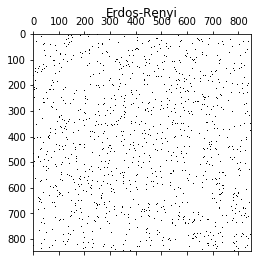

In [6]:
p = np.sum(adjacency) / (n_nodes**2)
er = erdos_renyi(n_nodes, p)

plt.spy(er)
plt.title('Erdos-Renyi')
print('Number of nodes = {n:}'.format(n=len(er)))
print('Number of links = {l:}'.format(l=np.count_nonzero(er)/2))

**Answer:**
To compare two models we need to have networks of approximately the same size in terms of number of nodes as well as edges. To achieve this, we take advantage of the fact that average clustering coefficient is equal to average degree divided by the number of nodes for an Erdos-Renyi random network. Therefore, we can set the probability to $p = \frac{Average  Degree}{N}$ using $Average Degree$ and $N$ from our network. As the true number of edges is equal to 8196, we observe that the random network is reasonably close to the real network in terms of number of edges.

### Question 3

Create a function that constructs a Barabási-Albert graph.

In [7]:
def barabasi_albert(n, m, m0=0, seed=None):
    """Create an instance from the Barabasi-Albert graph model.
    
    Parameters
    ----------
    n: int
        Size of the graph.
    m: int
        Number of edges to attach from a new node to existing nodes.
    m0: int (optional)
        Number of nodes for the inital connected network.
    seed: int (optional)
        Seed for the random number generator. To get reproducible results.
    
    Returns
    -------
    adjacency
        The adjacency matrix of a graph.
    """
    # Initialize network with two nodes connected 
    nodes = m0
    adjacency = np.zeros((nodes,nodes))
    
    # Set seed for reproducible results
    np.random.seed(seed)
    
    # Build initial network 
    if nodes == 2:
        #Connect the two existing links
        adjacency[0,1] = 1
        adjacency[1,0] = 1
    else:
        # Build initial network with at least one edge per new node. 
        # Final size m0 starting from 2 connected nodes.
        adjacency = barabasi_albert(m0, 1, m0=2, seed=seed)
    
    
    for i in range(n-m0):
        
        # Compute preference attachment
        # 1. degree of all the existing nodes:
        degrees = np.sum(adjacency, axis=1)
        # 2. probability distribution 
        prob = degrees/(np.sum(degrees))
        
        # Select to which nodes to connect.
        n = np.array(list(range(nodes)))
        to_connect = np.random.choice(n, size=m, p=prob, replace=False)
        
        # Expand Adjacency Matrix
        new_row = np.zeros((1,nodes))
        adjacency = np.vstack([adjacency, new_row])
        
        # Add connection to chosen nodes
        for i in to_connect:
            adjacency[nodes,i] = 1
        
        # Update adjacency matrix
        new_col = np.append(adjacency[nodes, :],[0])
        new_col = np.reshape(new_col,(new_col.shape[0],1))
        adjacency = np.hstack([adjacency, new_col])
        
        # Update graph size
        nodes += 1
    
    return adjacency

Text(0.5,1.05,'Barabasi-Albert (5, 1)')

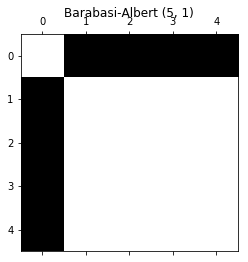

In [8]:
ba = barabasi_albert(5, 1, 2, 9087)
plt.spy(ba)
plt.title('Barabasi-Albert (5, 1)')

Text(0.5,1.05,'Barabasi-Albert (10, 2)')

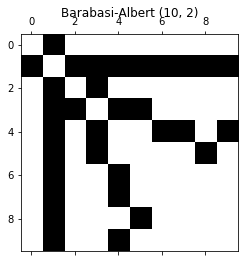

In [9]:
ba = barabasi_albert(10, 2, 3, 8708)
plt.spy(ba)
plt.title('Barabasi-Albert (10, 2)')

### Question 4

Use the function to create a random Barabási-Albert graph. Choose the parameters such that number of nodes is the same as in your graph, and the number of edges similar. You don't need to set the random seed. Comment on your choice of parameters.

Original number of edges: 8196.0
Barabási-Albert number of edges 8197.0
Original number of nodes: 848
Barabási-Albert number of nodes: 848


Text(0.5,1.05,'Barabasi-Albert (848, 10)')

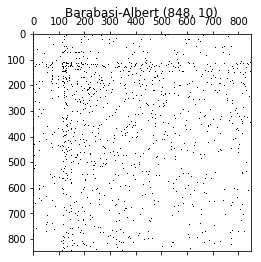

In [10]:
ba = barabasi_albert(n_nodes, 11, m0=113)
print('Original number of edges: {}\nBarabási-Albert number of edges {}'.format(n_edges, np.count_nonzero(ba)/2))
print('Original number of nodes: {}\nBarabási-Albert number of nodes: {}'.format(n_nodes, len(ba)))
plt.spy(ba)
plt.title('Barabasi-Albert (848, 10)')

**Answer**: To obtain a similar network in terms of number of nodes and edges, we have specified as final size of the network the number of nodes of the original network. The network is built in two steps: first, an initial network of m0 nodes is built adding one edge per new node.  
${Edges}_0 = m0-1$ 

In the following step, new nodes are incorporated to the existing network adding 11 edges per new node. This results in a total of 8197 edges in the network.

${Edges}_{total} = {Edges}_0 + (Nodes-m0)*Edge/Node$

### Definition of the new two network with the same nodes and edges as ours

In [11]:
p = np.sum(adjacency) / (n_nodes**2)
erdos_renyi_adj = erdos_renyi(n_nodes, p, seed=17)
barabasi_albert_adj = barabasi_albert(n_nodes, 11, m0=113, seed=7272)

### Question 5

Compare the number of edges in all three networks (your real network, the Erdős–Rényi network, and the Barabási-Albert netowk).

In [12]:
er_n_edges = np.sum(np.count_nonzero(erdos_renyi_adj)/2)
ba_n_edges = np.sum(np.count_nonzero(barabasi_albert_adj)/2)

print("Our network number of edges = %d" %n_edges)
print("Erdos-Renyi number of edges = %d" %er_n_edges)
print("Barabasi-Albert number of edges = %d" %ba_n_edges)

Our network number of edges = 8196
Erdos-Renyi number of edges = 8187
Barabasi-Albert number of edges = 8197


### Question 6

Implement a function that computes the [Kullback–Leibler (KL) divergence](https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence) between two probability distributions.
We'll use it to compare the degree distributions of networks.

In [13]:
def kl_divergence(p, q):
    """Compute the KL divergence between probability distributions of degrees of two networks.
    
    Parameters
    ----------
    p: np.array
        Probability distribution of degrees of the 1st graph.
    q: np.array
        Probability distribution of degrees of the 2nd graph.
    
    Returns
    -------
    kl
        The KL divergence between the two distributions.
    """
    
    return np.sum(p * np.log(np.divide(p, q)))

In [14]:
p_test = np.array([0.2, 0.2, 0.2, 0.4])
q_test = np.array([0.3, 0.3, 0.1, 0.3])
kl_divergence(p_test, q_test)

0.09151622184943575

### Question 7

Compare the degree distribution of your network to each of the two synthetic ones, in terms of KL divergence. **Hint:** Make sure you normalise your degree distributions to make them valid probability distributions.

In [15]:
def degree_distribution(adjacency):
    return np.sum(adjacency, axis=1)

In [16]:
def normalised_degree_distribution(adjacency):
    degree_distr = degree_distribution(adjacency)
    total_sum = np.sum(degree_distr)
    
    return degree_distr / total_sum

In [17]:
norm_degree_distr = normalised_degree_distribution(adjacency)
er_norm_degree_distr = normalised_degree_distribution(erdos_renyi_adj)
ba_norm_degree_distr = normalised_degree_distribution(barabasi_albert_adj)

print("KL(our network | erdos-renyi) = %f" %kl_divergence(
    norm_degree_distr, er_norm_degree_distr))
print("KL(our network | barabasi-albert) = %f" %kl_divergence(
    norm_degree_distr, ba_norm_degree_distr))

KL(our network | erdos-renyi) = 0.171071
KL(our network | barabasi-albert) = 0.317631


### Question 8

Plot the degree distribution historgrams for all three networks. Are they consistent with the KL divergence results? Explain.

Our degree distribution


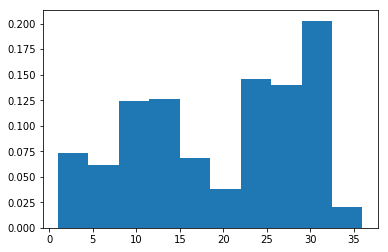

In [18]:
print("Our degree distribution")
o_degree_distr = degree_distribution(adjacency)
o_weights = np.ones_like(o_degree_distr) / float(n_nodes)
plt.hist(o_degree_distr, weights=o_weights);

Erdos-Renyi degree distribution


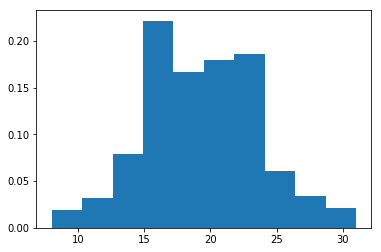

In [19]:
print("Erdos-Renyi degree distribution")
er_degree_distrib = degree_distribution(erdos_renyi_adj)
er_weights = np.ones_like(er_degree_distrib) / float(n_nodes)
plt.hist(er_degree_distrib, weights=er_weights);

Barabasi-Albert degree distribution


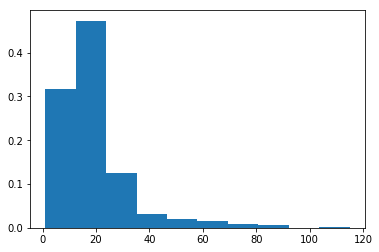

In [20]:
print("Barabasi-Albert degree distribution")
ba_degree_distrib = degree_distribution(barabasi_albert_adj)
ba_weights = np.ones_like(ba_degree_distrib) / float(n_nodes)
plt.hist(ba_degree_distrib, weights=ba_weights);

**Answer:**

Values of KL divergence closer to 0 indicates a higher similarity between the real network and the random network model in question. Our results show that the Erdos-Renyi model has a more closely resembling degree distribution since its KL divergence value is closer to 0 than that of Barabasi-Albert model. By visualizing the degree distribution, we observe that although none of them accurately capture the degree distribution of the real network, Barabasi-Albert model indeed does a poorer job because the vast majority of nodes have low numbers of degrees while the true network has a more widely distributed numbers of nodes across various values of degrees.

### Question 9

Imagine you got equal degree distributions. Would that guarantee you got the same graph? Explain.

**Answer:**
No, equal degree distributions do not guarantee the same graphs. While it means equal numbers of nodes have equal numbers of degrees, it does not specify which nodes are connected to which, which can vastly change the nature of the graph and imply very different relationships.

## Part 2

**You are allowed to use any additional library here (e.g., NetworkX, PyGSP, etc.).** Be careful not to include something here and use it in part 1!

In [21]:
# Import all functions that we wrote in milestone 1
from our_functions import *
import networkx as nx

### Question 10

Choose a random network model that fits you network well. Explain your choice. 

**Hint:** Check lecture notes for different network models and their properties. Your choice should be made based on at least one property you'd expect to be similar.

**Answer:**
We conclude that Watts-Strogatz random model best fits our network because it is expected to achieve a much higher average clustering coefficient than Erdos-Renyi or Barabasi-Albert models while retaining the small world property. Moreover, it is expected to produce a lower KL divergence value, which will indicate that its degree distribution emulates that of our network most closely.

We shall aim at producing a similar average clustering coefficient because the terrorist relations network is characterized by a relatively high average clustering coefficient (0.57277). Based on a few research articles, this number is higher than most other real social networks such as Facebook, Flikr, Orkut, or LiveJournal [1, 2]. This is an important finding in our network because it reveals that different groups of terrorists are tightly knit together via other terrorists that they know in common (**note:** nodes represent "relationships" and edges "terrorists"; therefore a node can be viewed as a gathering of terrorists). Thus, failing to capture this could lead to a network of a very different nature.

[1] https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=6883962

[2] http://delivery.acm.org/10.1145/2800000/2790304/a19-katzir.pdf?ip=128.179.199.227&id=2790304&acc=ACTIVE%20SERVICE&key=FC66C24E42F07228%2E7E17DDD1CCA0F75B%2E4D4702B0C3E38B35%2E4D4702B0C3E38B35&__acm__=1541765127_74d4995bde10c4840d097861db39773e

### Question 11

Explain (in short) how the chosen model works.

**Answer:**
Watts-Strogatz is an extension of the random network for small world property and high clustering coefficient. Its construction begins with a ring of N nodes with each node linked to K of its nearest neighbors. WIth probability p, these links are rewired to other random nodes, avoiding self loops.

In this case we have N = 848 as the number of nodes of our network, K = 20 so to have a similar number of edges and p = 8%.

While increasing K would imply a higher clustering coefficient, higher p would imply an increasingly random network. By experimenting with this last parameter, we can achieve a random model with a reasonably high clustering coefficient and the small-world property.

### Question 12

Create a random graph from that model, such that the number of nodes is the same as in your graph.

In [57]:
# Generate a Watts-Strogatz random model
ws = nx.connected_watts_strogatz_graph(n_nodes, 20, 0.08)
ws_adj = np.array(nx.adjacency_matrix(ws).todense())

print('Number of nodes in our network: {f:}'.format(f=n_nodes))
print('Number of nodes in Watts-Strogatz network: {f:}'.format(f=ws_adj.shape[1]))

print('Number of edges in our network: {f:}'.format(f=n_edges))
print('Number of edges in Watts-Strogatz network: {f:}'.format(f=np.sum(ws_adj)/2))

Number of nodes in our network: 848
Number of nodes in Watts-Strogatz network: 848
Number of edges in our network: 8196.0
Number of edges in Watts-Strogatz network: 8480.0


### Question 13

Check the properties you expected to be similar, and compare to your network.

Watts-Strogatz degree distribution


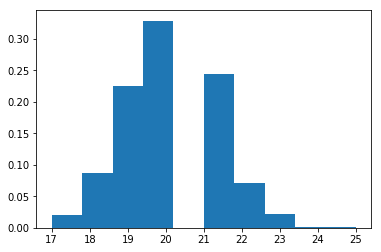

In [59]:
print("Watts-Strogatz degree distribution")
ws_degree_distr = degree_distribution(ws_adj)
ws_weights = np.ones_like(ws_degree_distr) / float(n_nodes)
plt.hist(ws_degree_distr, weights=ws_weights);

In [54]:
# Compute average clustering coefficients, diameters, and KL divergence for other models
# Our network
CC = [compute_clustering_coefficient(adjacency, i) for i in range(n_nodes)]
avg_CC = sum(CC) / len(CC)

# Watts-Strogatz
CC_ws = [compute_clustering_coefficient(ws_adj, i) for i in range(n_nodes)]
avg_CC_ws = sum(CC_ws)/len(CC_ws)

ws_norm_degree_distr = normalised_degree_distribution(ws_adj)
kl_ws = kl_divergence(norm_degree_distr, ws_norm_degree_distr)

# Erdos Renyi
CC_er = [compute_clustering_coefficient(erdos_renyi_adj, i) for i in range(n_nodes)]
avg_CC_er = sum(CC_er) / len(CC_er)

kl_er = kl_divergence(norm_degree_distr, er_norm_degree_distr)

# Barabasi-Albert
CC_ba = [compute_clustering_coefficient(barabasi_albert_adj, i) for i in range(n_nodes)]
avg_CC_ba = sum(CC_ba) / len(CC_ba)

kl_ba = kl_divergence(norm_degree_distr, ba_norm_degree_distr)

In [55]:
# compare
print('True average clustering coefficient: {d:.5f}'.format(d=avg_CC))
print('Watts-Strogatz average clustering coefficient: {d:.5f}'.format(d=avg_CC_ws))
print('Erdos Renyi average clustering coefficient: {d:.5f}'.format(d=avg_CC_er))
print('Barabasi-Albert average clustering coefficient: {d:.5f}'.format(d=avg_CC_ba))
print('')
print("KL(true network | Watts-Strogatz) = {k:.5f}".format(k=kl_ws))
print("KL(true network | Erdos-Renyi) = {k:.5f}".format(k=kl_er))
print("KL(true network | Barabasi-Albert) = {k:.5f}".format(k=kl_ba))

True average clustering coefficient: 0.57277
Watts-Strogatz average clustering coefficient: 0.55191
Erdos Renyi average clustering coefficient: 0.02308
Barabasi-Albert average clustering coefficient: 0.04957

KL(true network | Watts-Strogatz) = 0.14015
KL(true network | Erdos-Renyi) = 0.17107
KL(true network | Barabasi-Albert) = 0.31763


Are the results what you expected? Explain.

**Answer:**
As expected, **Watt-Strogatz** model does a much better job in producing a **higher clustering coefficient** and a **lower KL divergence** value than the other two random models. However, while obtaining a similar average clustering coefficient, the number of edges is still not quite close enough. This is because of the obvious limitation of the algorithm that can not replicate perfectly every tipe of real network.